<a href="https://colab.research.google.com/github/donnadietz/DonnasNotes/blob/master/pysheaf_example_0_LSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kb1dds/pysheaf.git
!pip install pysheaf/

fatal: destination path 'pysheaf' already exists and is not an empty directory.
Processing ./pysheaf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
  Created wheel for pysheaf: filename=pysheaf-0.3.1-py3-none-any.whl size=26228 sha256=60699369859989b56aaa9907d9975b91ba5954e0bbc72cdc4b23c917613db31e
  Stored in directory: /tmp/pip-ephem-wheel-cache-grzwpf2k/wheels/da/21/db/aab562b5fd8399716a0c527ab0ceceda34bbebe719ae382e4e
Successfully built pysheaf


In [ ]:
# Obligatory imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pysheaf as ps


In [ ]:
# Model: Points A, B, C, and D are fixed, LSR line (L) is being sought.  mb[0]=slope, mb[1]=intercept

# Define the sheaf and its cells/nodes
shf=ps.Sheaf()
shf.mNumpyNormType = 2  #The default norm would be "max".

In [ ]:
# The value held by the cell A is the y-coordinate of the point called A.  (B, C, D likewise...)
shf.AddCell('A',ps.Cell('real',dataDimension=1)) # default dataDimension=1 anyhow
shf.AddCell('B',ps.Cell('real',dataDimension=1))
shf.AddCell('C',ps.Cell('real',dataDimension=1))
shf.AddCell('D',ps.Cell('real',dataDimension=1))
shf.AddCell('L',ps.Cell('real2',dataDimension=2)) # This holds one numpy array of size two.  mb[0]=slope, mb[1]=intercept


In [ ]:
# From a Python standpiont, we could now fill the points with data, however, the best practice
# is to create your sheaf fully, then fill the entire thing with data.

# Add edges/arcs/Cofaces
shf.AddCoface('L','A',ps.Coface('real2','real',lambda mb : (  0*mb[0]+mb[1]))) #Partly hard-code point values! x-coords!
shf.AddCoface('L','B',ps.Coface('real2','real',lambda mb : (1.5*mb[0]+mb[1])))
shf.AddCoface('L','C',ps.Coface('real2','real',lambda mb : (1.5*mb[0]+mb[1])))
shf.AddCoface('L','D',ps.Coface('real2','real',lambda mb : (  3*mb[0]+mb[1])))

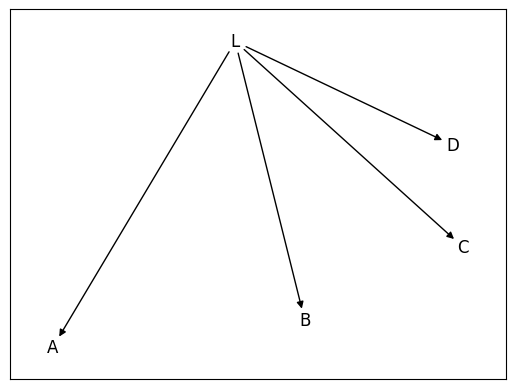

In [ ]:
# Make a plot, ugly as it may be, you may find a bug in your code, so check the plot anyhow.
pos=nx.layout.spiral_layout(shf)
nx.draw_networkx_labels(shf,pos)
nx.draw_networkx_edges(shf,pos)
#plt.show() #Uncomment this to see the plot if you want to.

In [ ]:
# Put (remaining) data on the cells
shf.GetCell('A').SetDataAssignment(ps.Assignment('real',1))  #Point A at (0,1)   Note: y-coords end up here!
shf.GetCell('B').SetDataAssignment(ps.Assignment('real',2))  #Point B at (1.5, 2)
shf.GetCell('C').SetDataAssignment(ps.Assignment('real',3))  #Point C at (1.5,3)
shf.GetCell('D').SetDataAssignment(ps.Assignment('real',4))  #Point D at (3,4)
shf.GetCell('L').SetDataAssignment(ps.Assignment('real2',np.array([1,1])))  #Bogus data only: y=3x+2 starting out


In [ ]:
# Maximally Extend all cells
# (This time, we only need L due to arrow directions. It doesn't hurt to do all of them though.)
#shf.MaximallyExtendCell('A')
#shf.MaximallyExtendCell('B')
#shf.MaximallyExtendCell('C')
#shf.MaximallyExtendCell('D')
shf.MaximallyExtendCell('L')

In [ ]:
# Starting point - Check your model - Make sure this is near zero.
print(shf.ComputeConsistencyRadius())

0.7071067811865476


In [ ]:
# By default, cells won't be optimized.
# Any cells containing bogus starter data should be flagged here so they can be adjusted.
shf.GetCell('L').mOptimizationCell = True

In [ ]:
# This is where all the sheaf magic occurs!
shf.FuseAssignment()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7071067811865476
       x: [ 1.000e+00  1.000e+00]
     nit: 1
     jac: [ 1.416e-07  3.725e-08]
    nfev: 3
    njev: 1

In [ ]:
# Report on what just happened to each cell and the overall Consistency Radius
for nd in shf.nodes():
    print('Value at {} is {}'.format(nd,shf.GetCell(nd).mDataAssignment))
print('Consistency Radius: '+str(shf.ComputeConsistencyRadius()) )

Value at A is 1
Value at B is 2
Value at C is 3
Value at D is 4
Value at L is [1.         1.00000001]
Consistency Radius: 0.7071067811865481
